### Predicting Loan Defaults (Classification Problem)

#### Business Understanding
Lending Club is a company that gives personal and business loans online. People can apply for loans, and Lending Club decides how risky each loan is. Then, investors can choose which loans they want to put their money into. The main challenges are figuring out how risky a loan might be, deciding how much interest to charge, finding out which loans might not be paid back, and helping investors pick a variety of loans to spread out their risk.

#### Business Objectives
###### Improve Risk Assessment: 
Make a better system to understand how risky each loan is by looking at the borrower's information and the loan details.
###### Set the Right Interest Rates: 
Use data to suggest interest rates that are fair and make sense based on how risky the loan is.
###### Predict Loan Defaults: 
Create a tool that can guess which loans might not be paid back, helping to avoid losses.
###### Help Investors Choose: 
Offer advice to investors on how to spread their investments across different types of loans to get a good balance of risk and reward.
###### Better Loans and Policies:
Look for trends in the data to make loans and rules better for attracting more borrowers while keeping risks low.

By focusing on these goals, Lending Club can make better loan decisions, offer fair interest rates, reduce the chance of loans not being paid back, and provide better advice to investors, making the lending and investing process clearer and more effective for everyone involved.

In [60]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [2]:
data = pd.read_csv("data/loan.csv", low_memory=False)
data = data.dropna(subset=["loan_status"])
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#reduce the data size to fasten following steps
#data = df.sample(n=100000, random_state=42)
#data = df.copy()

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', None) 

#### Exploratory Data Analysis (EDA)

The goal is to:

###### Understand the Data: 
Learn what kind of information is in your dataset and how it's organized.
###### Clean the Data: 
Fix any mistakes or missing parts in the data.
###### Find Patterns: 
Look for trends or connections between different parts of the data.
###### Find Anything Odd: 
Notice any data points that don't fit the pattern, as they could be mistakes or something interesting.
###### Ready for More Analysis: 
Decide what parts of the data might be useful for deeper study or building models.



In [12]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_length_int
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260638e+06,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,2260668.0,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,1.965233e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,2.260668e+06
mean,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,1.882420e+01,3.068792e-01,5.768354e-01,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03,1.814580e-02,1.0,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.477304e+00,2.036667e+00,4.521656e+00,1.354780e+04,1.139426e+04,5.789995e+01,8.464413e-03,1.236983e+01,1.257378e+02,1.814916e+02,1.402409e+01,8.297469e+00,1.555382e+00,2.484485e+01,7.024194e+00,5.002082e-01,3.676069e+00,5.629468e+00,4.774183e+00,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,5.587937e+00
std,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,1.418333e+01,8.672303e-01,8.859632e-01,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.547612e+03,7.546657e+03,9.889599e+03,9.884835e+03,8.304886e+03,2.663086e+03,1.150210e+01,7.258317e+02,1.271114e+02,5.971757e+03,1.508131e-01,0.0,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,3.000784e+00,9.256354e-01,1.578672e+00,2.604919e+01,4.409746e+04,2.374839e+01,1.506827e+00,2.596911e+00,5.690561e+03,2.090475e+01,3.672850e+04,1.489456e+00,2.672991e+00,2.383117e+00,3.164229e+00,1.647408e+04,1.659953e+04,2.858347e+01,1.048098e-01,7.264648e+02,5.338218e+01,9.711845e+01,1.753308e+01,9.208557e+00,1.904981e+00,3.231925e+01,5.965411e+00,1.350326e+00,2.324646e+00,3.382874e+0

In [13]:
data.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal   

Data Cleaning:

1. Remove Exclusions
2. Remove Outliers.
3. Impute Missing Values

In [14]:
def map_emp_length(emp_length):
    """
    Maps employment length to a numerical value.
    """
    emp_length_mapping = {
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0.5,
        'n/a': 0
    }
    return emp_length_mapping.get(emp_length, 0)  # Default to 0 if not found

def map_state_to_region(state):
    """
    Maps a state to its corresponding region.
    """
    state_to_region = {
        **dict.fromkeys(['CA', 'OR', 'UT', 'WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID'], 'West'),
        **dict.fromkeys(['AZ', 'TX', 'NM', 'OK'], 'SouthWest'),
        **dict.fromkeys(['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN'], 'SouthEast'),
        **dict.fromkeys(['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND'], 'MidWest'),
        **dict.fromkeys(['CT', 'NY', 'PA', 'NJ', 'RI', 'MA', 'MD', 'VT', 'NH', 'ME'], 'NorthEast')
    }
    return state_to_region.get(state, 'Unknown')  # Default to 'Unknown' if not found


In [15]:
data['emp_length_int'] = data['emp_length'].apply(map_emp_length)
data['region'] = data['addr_state'].apply(map_state_to_region)

# Display the head of the DataFrame, transposed for better readability
data.head().transpose()

,0,1,2,3,4
loan_amnt,2500,30000,5000,4000,30000
funded_amnt,2500,30000,5000,4000,30000
funded_amnt_inv,2500.0,30000.0,5000.0,4000.0,30000.0
term,36 months,60 months,36 months,36 months,60 months
int_rate,13.56,18.94,17.97,18.94,16.14
installment,84.92,777.23,180.69,146.51,731.78
grade,C,D,D,D,C
sub_grade,C1,D2,D1,D2,C4
emp_title,Chef,Postmaster,Administrative,IT Supervisor,Mechanic
emp_length,10+ years,10+ years,6 years,10+ years,10+ years


In [16]:
missing_values_count = data.isnull().sum()

# Calculating the percentage of missing values in each column
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Combining both counts and percentages into a single DataFrame for a clearer view
missing_values_df = pd.DataFrame({'Missing Values': missing_values_count, 'Percentage (%)': missing_values_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_values_df_sorted = missing_values_df.sort_values(by='Percentage (%)', ascending=False)

missing_values_df_sorted



,Missing Values,Percentage (%)
il_util,1068850,47.280273
mths_since_rcnt_il,909924,40.250227
all_util,866348,38.322655
open_acc_6m,866130,38.313012
inq_last_12m,866130,38.313012
total_cu_tl,866130,38.313012
open_il_24m,866129,38.312968
open_act_il,866129,38.312968
open_il_12m,866129,38.312968
total_bal_il,866129,38.312968


In [17]:
# Identify columns where the percentage of missing values is greater than 80%
columns_to_drop = missing_values_percentage[missing_values_percentage > 50].index

# Drop these columns from the DataFrame
data.drop(columns=columns_to_drop, inplace=True)

# Verify the columns have been dropped
print(data.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'emp_length_int', 'region'], dtype='object', length=103)


In [18]:
# Drop the columns which add no value to the outcome
no_value_columns = [
    'collection_recovery_fee',
    'last_pymnt_amnt',
    'out_prncp',
    'out_prncp_inv',
    'recoveries',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp'
]

data.drop(no_value_columns, axis=1, inplace=True)

In [19]:
missing_values_count = data.isnull().sum()

# Calculating the percentage of missing values in each column
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Combining both counts and percentages into a single DataFrame for a clearer view
missing_values_df = pd.DataFrame({'Missing Values': missing_values_count, 'Percentage (%)': missing_values_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_values_df_sorted = missing_values_df.sort_values(by='Percentage (%)', ascending=False)

missing_values_df_sorted

,Missing Values,Percentage (%)
il_util,1068850,47.280273
mths_since_rcnt_il,909924,40.250227
all_util,866348,38.322655
total_cu_tl,866130,38.313012
inq_last_12m,866130,38.313012
open_acc_6m,866130,38.313012
open_il_12m,866129,38.312968
open_il_24m,866129,38.312968
total_bal_il,866129,38.312968
open_act_il,866129,38.312968


In [20]:
#drop repeated features

data.drop(['emp_length','emp_title','title','zip_code','issue_d','earliest_cr_line','addr_state'], axis=1, inplace=True)

# unique values a categorical variable (object) has
data.select_dtypes(include=["object"]).nunique()  #include/exclude

term                      2
grade                     7
sub_grade                35
home_ownership            6
verification_status       3
loan_status               9
pymnt_plan                2
purpose                  14
initial_list_status       2
last_pymnt_d            135
last_credit_pull_d      140
application_type          2
hardship_flag             2
disbursement_method       2
debt_settlement_flag      2
region                    5
dtype: int64

In [21]:
distinct_terms = data['term'].unique()
print("Distinct values of 'term':", distinct_terms)

Distinct values of 'term': [' 36 months' ' 60 months']


In [22]:
# Convert 'term' into numeric by extracting the number of months
data['term'] = data['term'].str.extract('(\d+)').astype(float)

# Verifying the conversion by displaying the unique values of the new numeric column
unique_terms_numeric = data['term'].unique()
unique_terms_numeric

array([36., 60.])

In [23]:
unique_loan_status_counts = data['loan_status'].value_counts()

unique_loan_status_counts

loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64

In [24]:
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x in ['Fully Paid', 'Current','Does not meet the credit policy. Status:Fully Paid'] else 0)

In [25]:

# for object variables - Get the mode of next payment date and last payment date and the last date credit amount was pulled
for column in ["last_pymnt_d", "last_credit_pull_d"]:  #, 'income_category'
    data[column] = data.groupby("region")[column].transform(lambda x: x.fillna(x.mode()))

# for numerical variables
# Get the mode on the number of accounts in which the borrower is delinquent
data["pub_rec"] = data.groupby("region")["pub_rec"].transform(lambda x: x.fillna(x.median()))
# Get the mode of the total number of credit lines the borrower has
data["total_acc"] = data.groupby("region")["total_acc"].transform(lambda x: x.fillna(x.median()))

data["emp_length_int"] = data.groupby("region")["emp_length_int"].transform(lambda x: x.fillna(x.median()))

# Get the mean of the annual income depending on the region the borrower is located.
data["annual_inc"] = data.groupby("region")["annual_inc"].transform(lambda x: x.fillna(x.mean()))
# Mode of credit delinquencies in the past two years.
data["delinq_2yrs"] = data.groupby("region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))

In [26]:
data.fillna(0, inplace=True)
data.isnull().sum().max()

0

In [27]:
#Removing outliers
# Define a dictionary with columns as keys and their respective outlier thresholds as values
outlier_thresholds = {
    'annual_inc': 250000,
    'dti': 50,
    'open_acc': 40,
    'total_acc': 80,
    'revol_util': 120,
    'revol_bal': 250000
}

print("Dataset before removing outliers:", data.shape)

# Apply the outlier removal criteria for each column in the dictionary
for column, threshold in outlier_thresholds.items():
    data = data[data[column] <= threshold]

# Reset index after removing outliers
data.reset_index(drop=True, inplace=True)

print("Dataset after removing outliers:", data.shape)

# Display the head of the DataFrame, transposed for better readability
data.head().transpose()

Dataset before removing outliers: (2260668, 86)
Dataset after removing outliers: (2215300, 86)


,0,1,2,3,4
loan_amnt,2500,30000,5000,4000,30000
funded_amnt,2500,30000,5000,4000,30000
funded_amnt_inv,2500.0,30000.0,5000.0,4000.0,30000.0
term,36.0,60.0,36.0,36.0,60.0
int_rate,13.56,18.94,17.97,18.94,16.14
installment,84.92,777.23,180.69,146.51,731.78
grade,C,D,D,D,C
sub_grade,C1,D2,D1,D2,C4
home_ownership,RENT,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE
annual_inc,55000.0,90000.0,59280.0,92000.0,57250.0


In [28]:
unique_loan_status_counts = data['loan_status'].value_counts()

unique_loan_status_counts

loan_status
1    1922341
0     292959
Name: count, dtype: int64

In [29]:
loan_status_counts = data['loan_status'].value_counts(normalize=True) * 100

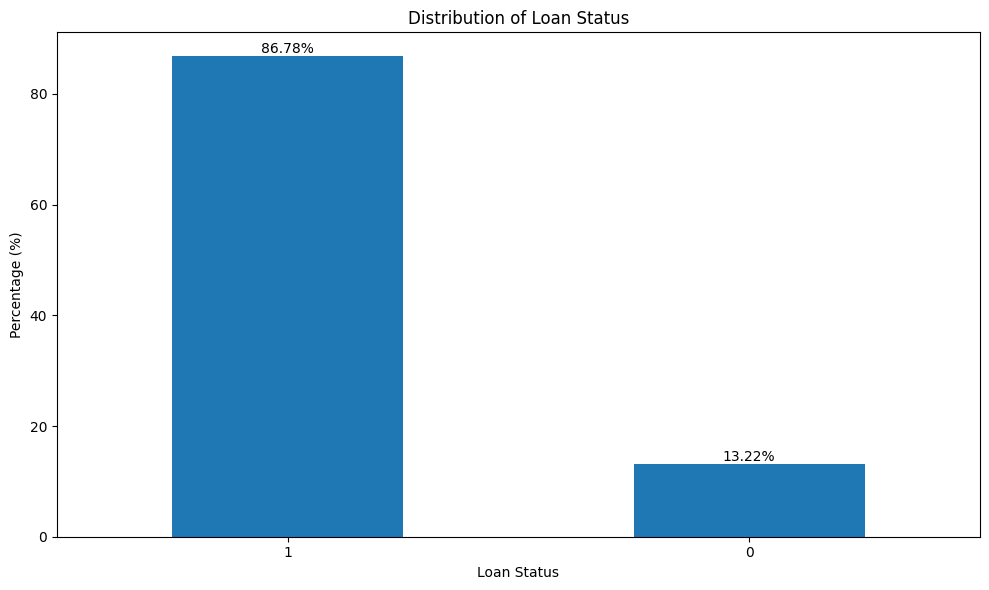

In [30]:
# Plotting the histogram with percentages
plt.figure(figsize=(10, 6))
loan_status_counts.plot(kind='bar')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=360)

# Annotating the bars with the percentage values
for index, value in enumerate(loan_status_counts):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####
From the above distribution, we can see that there are about 11.5% of the loans which were bad(defaulted) in the overall data

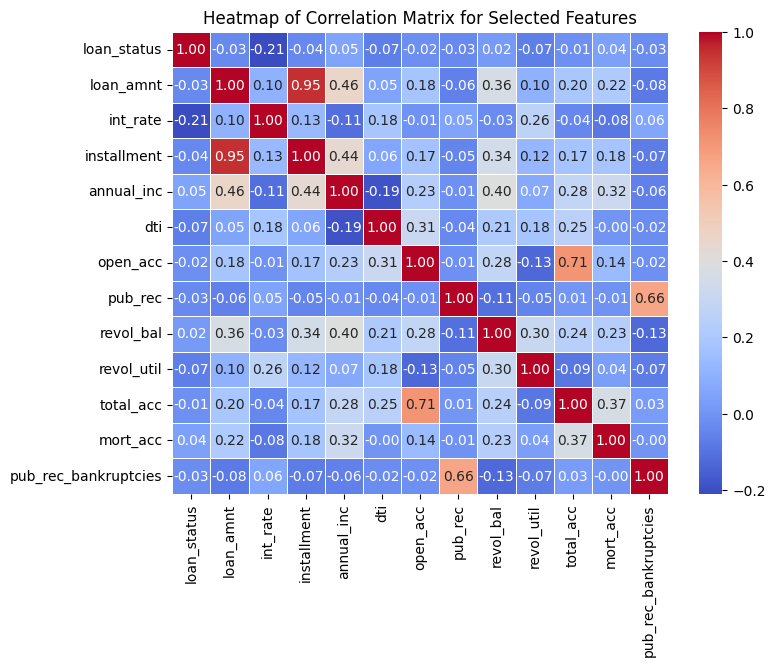

In [31]:
# Attempting with a commonly relevant subset for loan data analysis
subset_columns = ['loan_status','loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec','revol_bal', 'revol_util','total_acc','mort_acc','pub_rec_bankruptcies']

# Plotting the heatmap again with the reduced set of features
plt.figure(figsize=(8, 6))
sns.heatmap(data[subset_columns].corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Selected Features')
plt.show()


From the heatmap, there is a very good correlation 
1. Between "loan_amnt" the "installment" feature. 
2. Between loan_amnt and also the annual_inc but this might be irrevalant because higher income means higher loan amount.
3. 

installment: Monthly payment by borrower.
loan_amnt: The loan taken by borrower.
annual_inc: Borrower annual income

In [32]:
data['loan_status_str'] = data['loan_status'].map({0: 'Bad', 1: 'Good'})


In [33]:
loan_status_percentages = data['loan_status_str'].value_counts(normalize=True) * 100


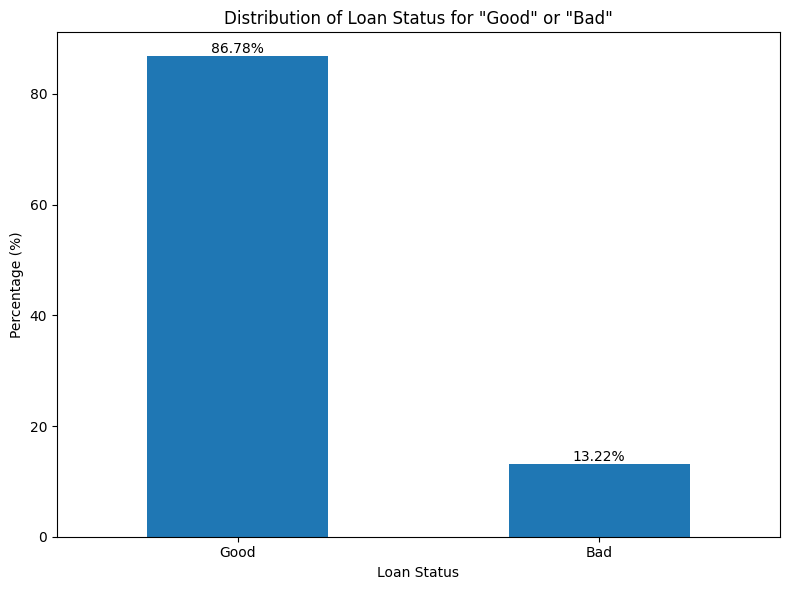

In [34]:
# Plotting
plt.figure(figsize=(8, 6))
loan_status_percentages.plot(kind='bar')
plt.title('Distribution of Loan Status for "Good" or "Bad"')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Annotate with the percentage values
for index, value in enumerate(loan_status_percentages):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### I'll Focus on variables such as loan amount, interest rate, term, grade, employment length, annual income, and debt-to-income ratio to compare the characteristics of loans that are "Charged Off" to those that are "Fully Paid"

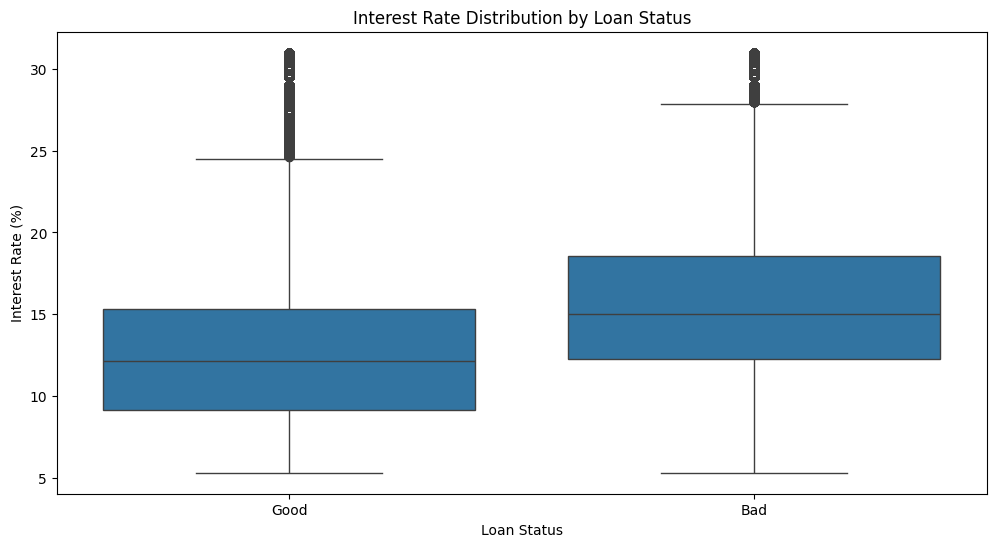

In [35]:
# Comparing Interest Rates between 'Fully Paid' and 'Charged Off'
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status_str', y='int_rate', data=data)
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()



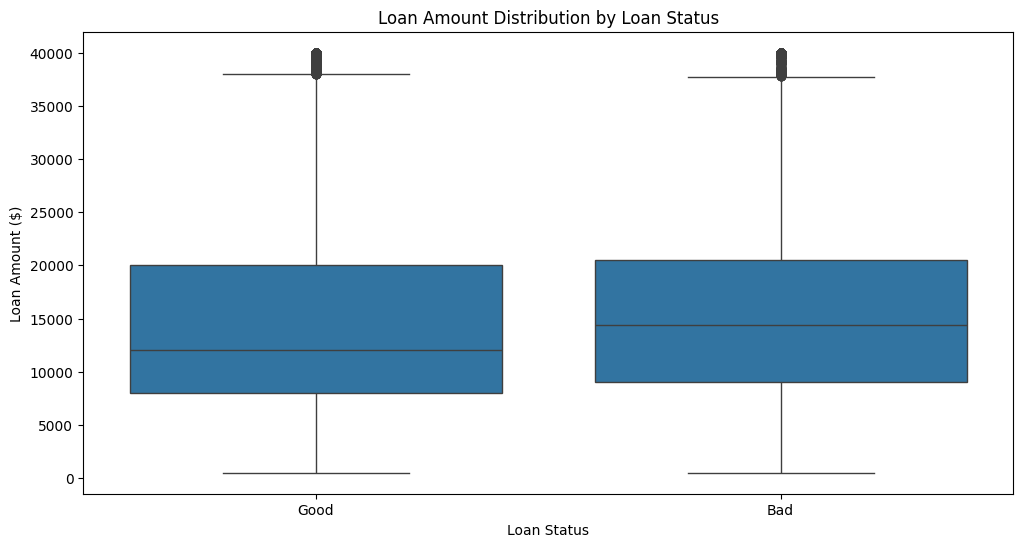

In [36]:
# Comparing Loan Amounts between 'Fully Paid' and 'Charged Off'
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status_str', y='loan_amnt', data=data)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.show()



The above observations suggest that interest rate is a significant factor in the risk of default, while the amount of the loan also has an impact but to a lesser extent. 

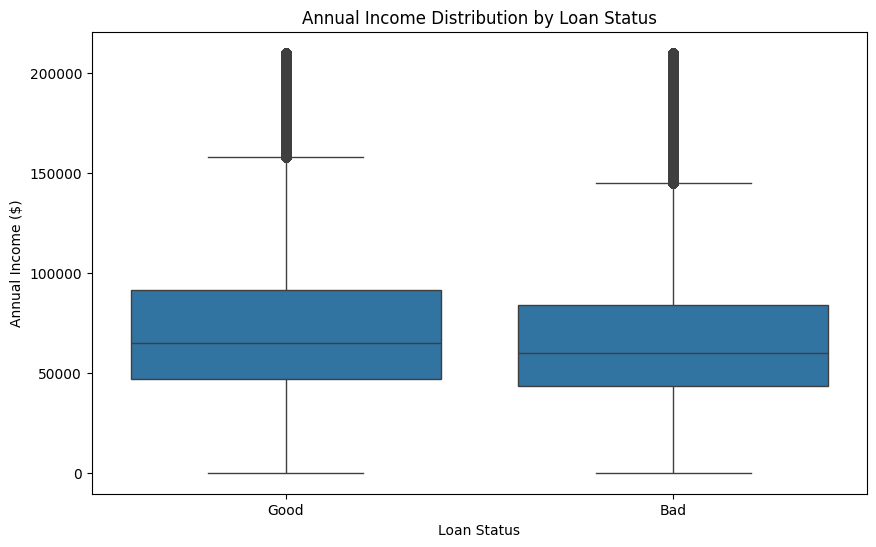

In [37]:
annual_inc_99th = data['annual_inc'].quantile(0.99)

filtered_data_for_plot = data[data['annual_inc'] <= annual_inc_99th]

# Plotting loan status against annual_inc
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status_str', y='annual_inc', data=filtered_data_for_plot)
plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')

plt.show()

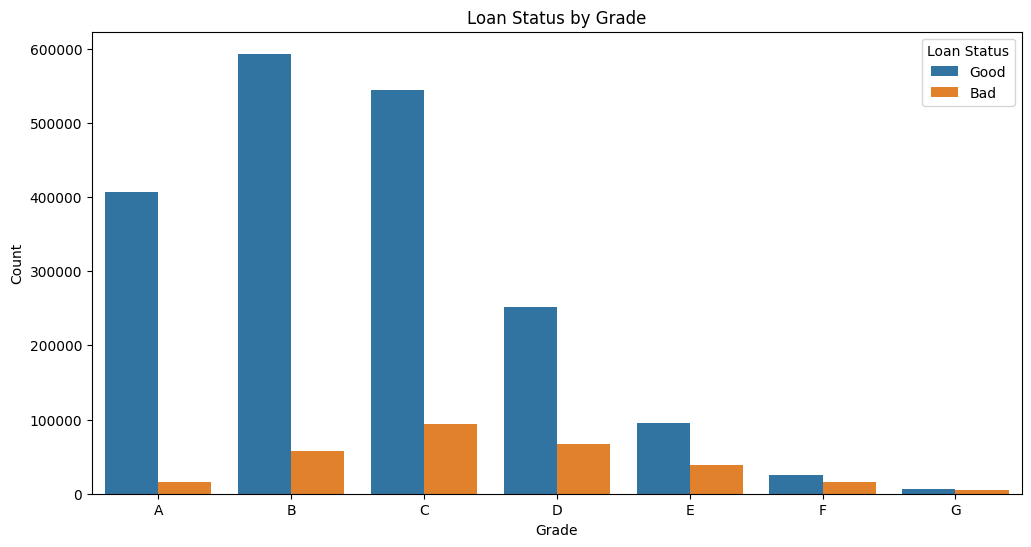

In [38]:
# Using a count plot to show loan status by grade
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status_str', data=data, order=sorted(data['grade'].unique()))
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.show()

In [39]:
status_by_grade = data.groupby(['grade', 'loan_status_str']).size().unstack(fill_value=0)

# Calculating the percentage of 'Fully Paid' vs 'Charged Off' in each grade
status_by_grade['Total'] = status_by_grade.sum(axis=1)
status_by_grade['Good (%)'] = (status_by_grade['Good'] / status_by_grade['Total']) * 100
status_by_grade['Bad (%)'] = (status_by_grade['Bad'] / status_by_grade['Total']) * 100

status_by_grade[['Good (%)', 'Bad (%)']]

loan_status_str,Good (%),Bad (%)
grade,,
A,96.267747,3.732253
B,91.103536,8.896464
C,85.222086,14.777914
D,79.106695,20.893305
E,71.152619,28.847381
F,62.966391,37.033609
G,59.111560,40.888440


The above observations suggest that loan grade is a significant factor in the risk of default, lower the grade, higher default.

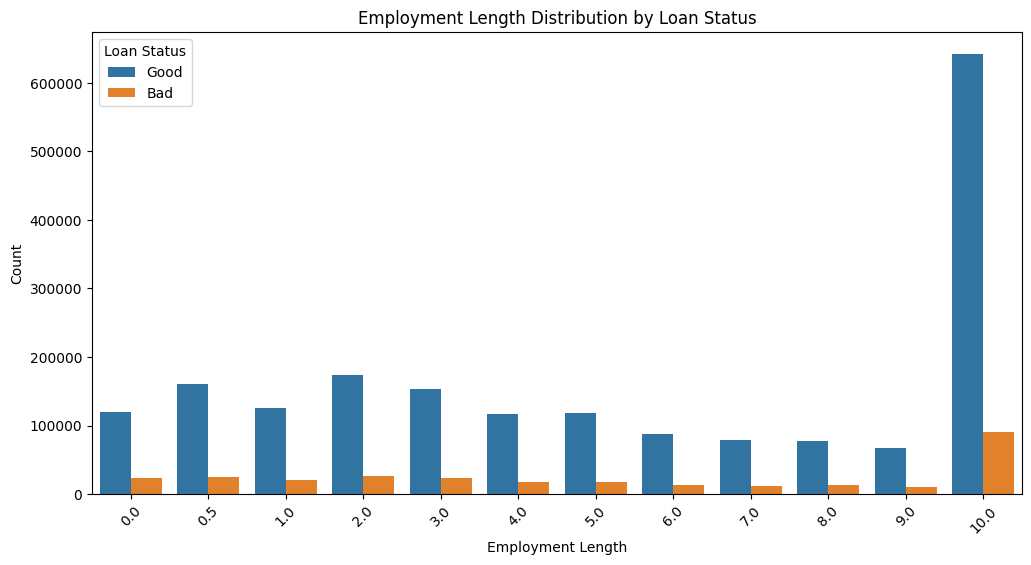

In [40]:
data_nonan = data.dropna(subset=['emp_length_int'])

# Plotting 'emp_length_int' against 'loan_status_str' for the filtered
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length_int', hue='loan_status_str', data=data_nonan,
              order=sorted(data_nonan['emp_length_int'].unique(), key=lambda x: (len(str(x)), x)))
plt.title('Employment Length Distribution by Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

In [41]:
grouped_counts = data.groupby(['emp_length_int', 'loan_status_str']).size().unstack()

grouped_counts['Total'] = grouped_counts.sum(axis=1)

#Calculate percentages for 'Fully Paid' and 'Charged Off'
grouped_counts['Good (%)'] = (grouped_counts['Good'] / grouped_counts['Total']) * 100
grouped_counts['Bad (%)'] = (grouped_counts['Bad'] / grouped_counts['Total']) * 100

print(grouped_counts[['Good (%)', 'Bad (%)']])

loan_status_str   Good (%)    Bad (%)
emp_length_int                       
0.0              83.959319  16.040681
0.5              86.818179  13.181821
1.0              86.314751  13.685249
2.0              86.815818  13.184182
3.0              86.725923  13.274077
4.0              86.961581  13.038419
5.0              86.853628  13.146372
6.0              86.845659  13.154341
7.0              86.302499  13.697501
8.0              85.620734  14.379266
9.0              86.078660  13.921340
10.0             87.623902  12.376098


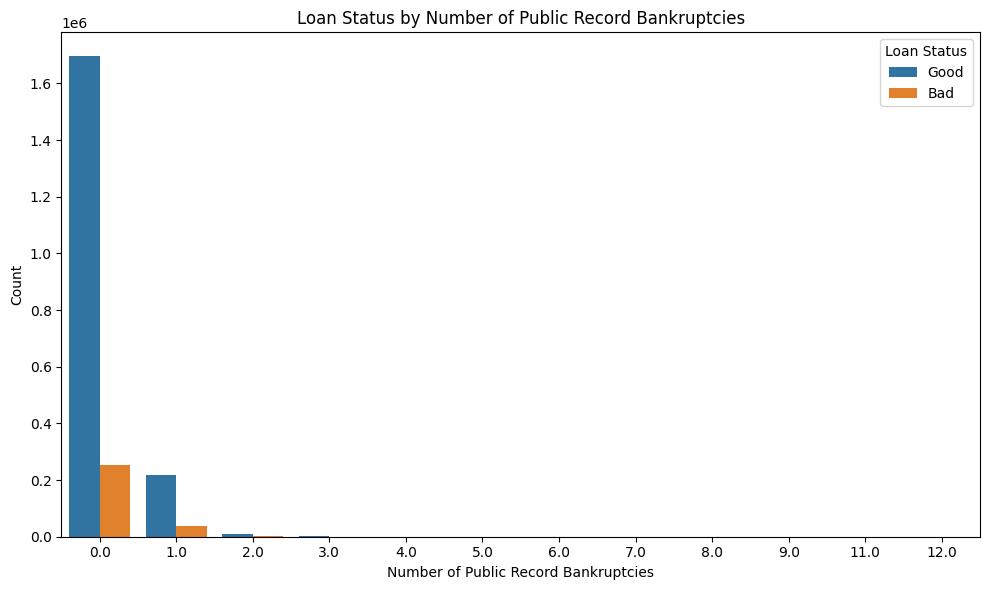

In [42]:
# Step 3: Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status_str', data=data)
plt.title('Loan Status by Number of Public Record Bankruptcies')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

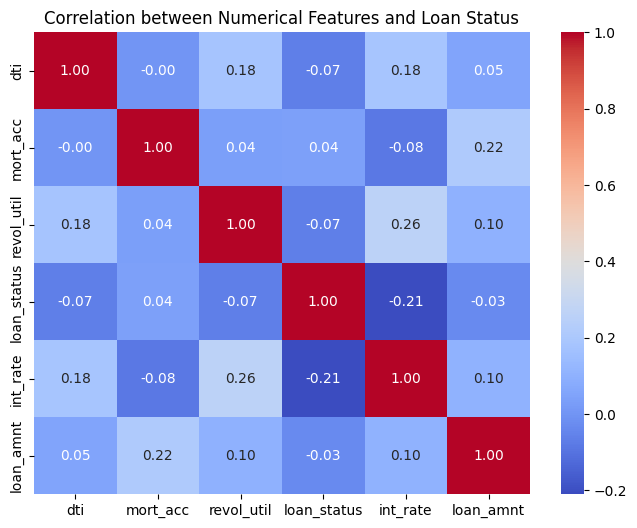

In [43]:
# Selecting relevant columns for correlation calculation
selected_columns = data[['dti', 'mort_acc', 'revol_util', 'loan_status', 'int_rate','loan_amnt']]

# Step 2: Calculate correlations
correlation_matrix = selected_columns.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numerical Features and Loan Status')
plt.show()

## Conclusion:
There are two type of features:

1. Applicant Features like occupation, employment details, etc.
2. Loan Features, like rate, amount, purpose etc.


#### The most important feature remains:
1. Interest Rate
2. DTI (Debt to Income Ratio)
3. Utilization of Revolving accounts
2. Higher Annual income means low changes of defaults.
3. Lower loan grade means high defaults.
4. If there is a past bankruptcy, then the chances are higher for the bankruptcy

In [44]:
#Handle categorical variables via encoding, first I'll try with Ordinal Encoding 
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [45]:
categorical_cols

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'region', 'loan_status_str'], dtype='object')

In [46]:
# Filter the DataFrame for categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category'])


columns_with_limited_values = data.nunique().loc[lambda x: x.isin([2, 3,4,5])]

categorical_columns

#unique_values = {col: data[col].unique() for col in categorical_columns.index}

#unique_values

In [47]:
print(columns_with_limited_values)

term                    2
verification_status     3
loan_status             2
pymnt_plan              2
initial_list_status     2
application_type        2
num_tl_30dpd            5
hardship_flag           2
disbursement_method     2
debt_settlement_flag    2
region                  5
loan_status_str         2
dtype: int64


In [48]:
#print(categorical_columns)

In [49]:
# Dictionary for ordinal encoding
ordinal_mappings = {
    'term': {'36.': 36, '60.': 60},
    'verification_status': {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2},
    'pymnt_plan': {'n': 0, 'y': 1},
    'initial_list_status': {'w': 0, 'f': 1},
    'application_type': {'Individual': 0, 'Joint App': 1},
    'acc_now_delinq': {'0.': 0, '1.': 1,'2.': 2, '3.': 3},
    'num_tl_120dpd_2m': {'0.': 0, '1.': 1,'2.': 2, '3.': 3},
    'num_tl_30dpd': {'0.': 0, '1.': 1,'2.': 2, '3.': 3},
    'hardship_flag': {'N': 0, 'Y': 1},
    'disbursement_method': {'Cash': 0, 'DirectPay': 1},
    'debt_settlement_flag': {'N': 0, 'Y': 1},
    'home_ownership': {'RENT': 0, 'OWN': 1,'MORTGAGE': 2, 'ANY': 3,'OTHER': 4, 'NONE': 5}
}

pd.set_option('future.no_silent_downcasting', True)

# Applying ordinal encoding
for col, mapping in ordinal_mappings.items():
    data[col] = data[col].replace(mapping).astype(int)
    

In [50]:
# Using pandas get_dummies for one-hot encoding
categorical_columns = ['grade', 'sub_grade', 'purpose', 'last_pymnt_d', 'last_credit_pull_d', 'region','term', 'verification_status', 'application_type', 'pymnt_plan', 'initial_list_status', 'application_type','hardship_flag','disbursement_method','debt_settlement_flag','home_ownership']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

In [51]:
data_encoded.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_length_int,loan_status_str,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,last_pymnt_d_0,last_pymnt_d_Apr-2008,last_pymnt_d_Apr-2009,last_pymnt_d_Apr-2010,last_pymnt_d_Apr-2011,last_pymnt_d_Apr-2012,last_pymnt_d_Apr-2013,last_pymnt_d_Apr-2014,last_pymnt_d_Apr-2015,last_pymnt_d_Apr-2016,last_pymnt_d_Apr-2017,last_pymnt_d_Apr-2018,last_pymnt_d_Aug-2008,last_pymnt_d_Aug-2009,last_pymnt_d_Aug-2010,last_pymnt_d_Aug-2011,last_pymnt_d_Aug-2012,last_pymnt_d_Aug-2013,last_pymnt_d_Aug-2014,last_pymnt_d_Aug-2015,last_pymnt_d_Aug-2016,last_pymnt_d_Aug-2017,last_pymnt_d_Aug-2018,last_pymnt_d_Dec-2007,last_pymnt_d_Dec-2008,last_pymnt_d_Dec-2009,last_pymnt_d_Dec-2010,last_pymnt_d_Dec-2011,last_pymnt_d_Dec-2012,last_pymnt_d_Dec-2013,last_pymnt_d_Dec-2014,last_pymnt_d_Dec-2015,last_pymnt_d_Dec-2016,last_pymnt_d_Dec-2017,last_pymnt_d_Dec-2018,last_pymnt_d_Feb-2008,last_pymnt_d_Feb-2009,last_pymnt_d_Feb-2010,last_pymnt_d_Feb-2011,last_pymnt_d_Feb-2012,last_pymnt_d_Feb-2013,last_pymnt_d_Feb-2014,last_pymnt_d_Feb-2015,last_pymnt_d_Feb-2016,last_pymnt_d_Feb-2017,last_pymnt_d_Feb-2018,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2008,last_pymnt_d_Jan-2009,last_pymnt_d_Jan-2010,last_pymnt_d_Jan-2011,last_pymnt_d_Jan-2012,last_pymnt_d_Jan-2013,last_pymnt_d_Jan-2014,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jan-2017,last_pymnt_d_Jan-2018,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2008,last_pymnt_d_Jul-2009,last_pymnt_d_Jul-2010,last_pymnt_d_Jul-2011,last_pymnt_d_Jul-2012,last_pymnt_d_Jul-2013,last_pymnt_d_Jul-2014,last_pymnt_d_Jul-2015,last_pymnt_d_Jul-2016,last_pymnt_d_Jul-2017,last_pymnt_d_Jul-2018,last_pymnt_d_Jun-2008,last_pymnt_d_Jun-2009,last_pymnt_d_Jun-2010,last_pymnt_d_Jun-2011,last_pymnt_d_Jun-2012,last_pymnt_d_Jun-2013,last_pymnt_d_Jun-2014,last_pymnt_d_Jun-2015,last_pymnt_d_Jun-2016,last_pymnt_d_Jun-2017,last_pymnt_d_Jun-2018,last_pymnt_d_Mar-2008,last_pymnt_d_Mar-2009,last_pymnt_d_Mar-2010,last_pymnt_d_Mar-2011,last_pymnt_d_Mar-2012,last_pymnt_d_Mar-2013,last_pymnt_d_Mar-2014,last_pymnt_d_Mar-2015,last_pymnt_d_Mar-2016,last_pymnt_d_Mar-2017,last_pymnt_d_Mar-2018,last_pymnt_d_May-2008,last_pymnt_d_May-2009,last_pymnt_d_May-2010,last_pymnt_d_May-2011,last_pymnt_d_May-2012,last_pymnt_d_May-2013,last_pymnt_d_May-2014,last_pymnt_d_May-2015,last_

In [52]:
y = data_encoded['loan_status_str']
X = data_encoded.drop(['loan_status','loan_status_str'], axis = 1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)


In [54]:
rfc = RandomForestClassifier(n_jobs=4, random_state=42, criterion='gini', n_estimators=100, verbose=False)


In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [58]:

rfc_preds = rfc.predict(X_test)


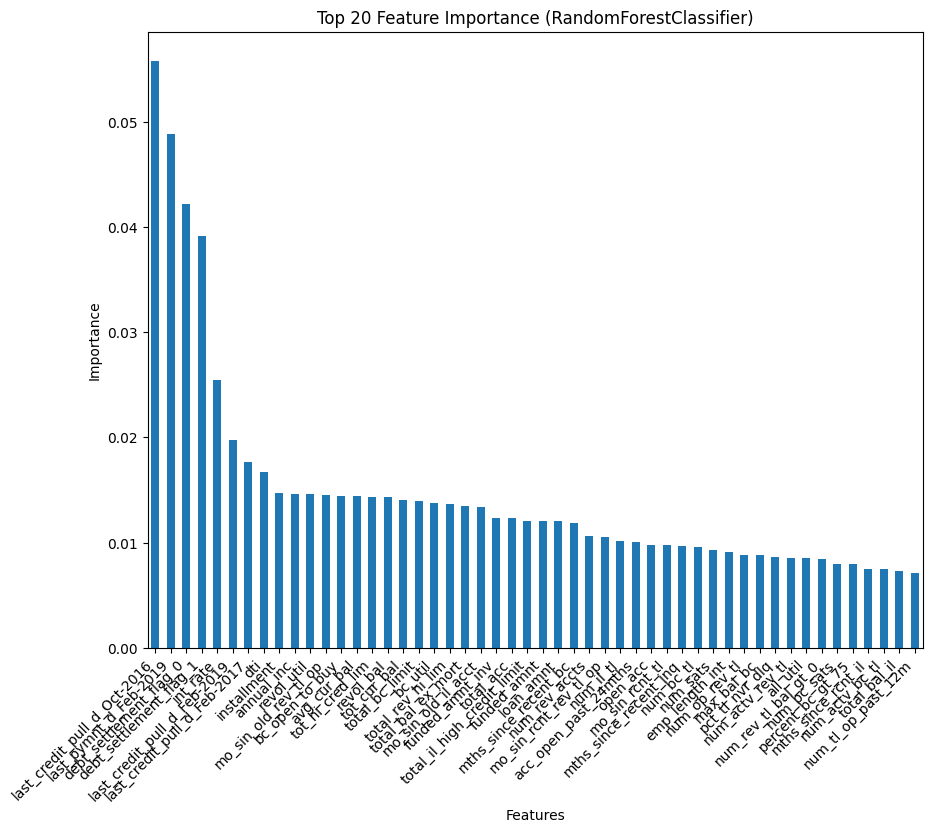

In [57]:
feature_importances = rfc.feature_importances_

feature_names = X_train.columns

importances = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

top_20_importances = importances[:50]

# Plotting
plt.figure(figsize=(10,8))
top_20_importances.plot(kind='bar')
plt.title('Top 20 Feature Importance (RandomForestClassifier)')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.show()


# From feature importance it appears that EDA analysis matches with the result of feature importance where int_rate, debt settlement flag, dti, installment and annual income are important features

In [64]:
# Using RandomizedSearchCV to find the best hyperparameters

rfc_pipeline = Pipeline([('rfc', RandomForestClassifier())])
rfc_param_grid = {'rfc__n_estimators': [100, 200, 300],                  
              'rfc__max_features': ['sqrt', 'log2'],
              'rfc__max_depth': range(1, 4, 6)
         }

# Enable grid search parallel
rfc_grid_rs = RandomizedSearchCV(estimator=rfc_pipeline, param_distributions=rfc_param_grid, cv=5, n_jobs=4, n_iter = 100, scoring='accuracy')


rfc_grid_rs_start = time.time()

rfc_grid_rs.fit(X_train, y_train)

rfc_grid_rs_stop = time.time()
print(f'Grid Search Time : {(rfc_grid_rs_stop - rfc_grid_rs_start): .8f}s')

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Grid Search Time :  532.28290391s


In [67]:
# Best parameter set found by GridSearch
print("Best parameters:", rfc_grid_rs.best_params_)

# Best estimator
best_rf = rfc_grid_rs.best_estimator_

print("Best estimator:", best_rf)

Best parameters: {'rfc__n_estimators': 100, 'rfc__max_features': 'sqrt', 'rfc__max_depth': 1}
Best estimator: Pipeline(steps=[('rfc', RandomForestClassifier(max_depth=1))])
